In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Dataset: https://www.kaggle.com/datasets/shivam2503/diamonds

In [88]:
# Załadowanie danych
diamonds = sns.load_dataset('diamonds')
print(diamonds.head())
print(diamonds.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float6

In [89]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [90]:
# Zakodowanie zmiennych kategorycznych
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

In [91]:
diamonds['cut'] = le_cut.fit_transform(diamonds['cut'])
diamonds['color'] = le_color.fit_transform(diamonds['color'])
diamonds['clarity'] = le_clarity.fit_transform(diamonds['clarity'])

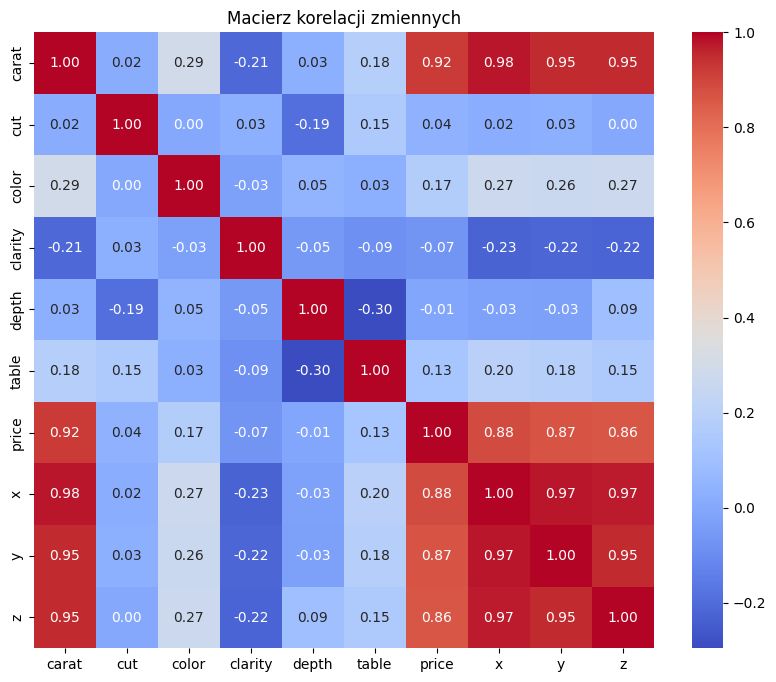

In [92]:
# Wykres korelacji
corr = diamonds.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji zmiennych')
plt.show()

In [93]:
diamonds.drop(["cut", "color", "clarity", "depth", "table", "x", "y", "z"], axis=1, inplace=True)

In [94]:
diamonds

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [95]:
corr = diamonds.corr()

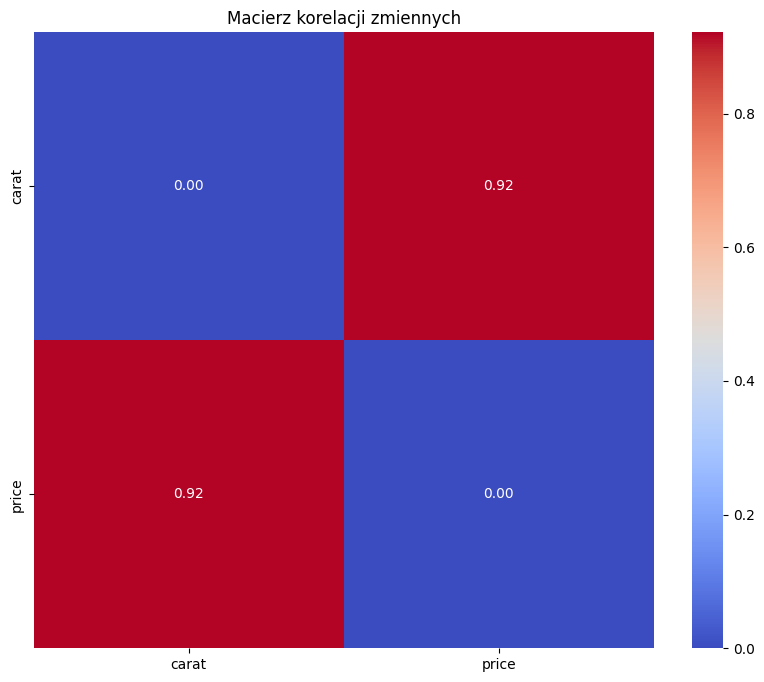

In [96]:
# Wykres korelacji
np.fill_diagonal(corr.to_numpy(), 0)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji zmiennych')
plt.show()

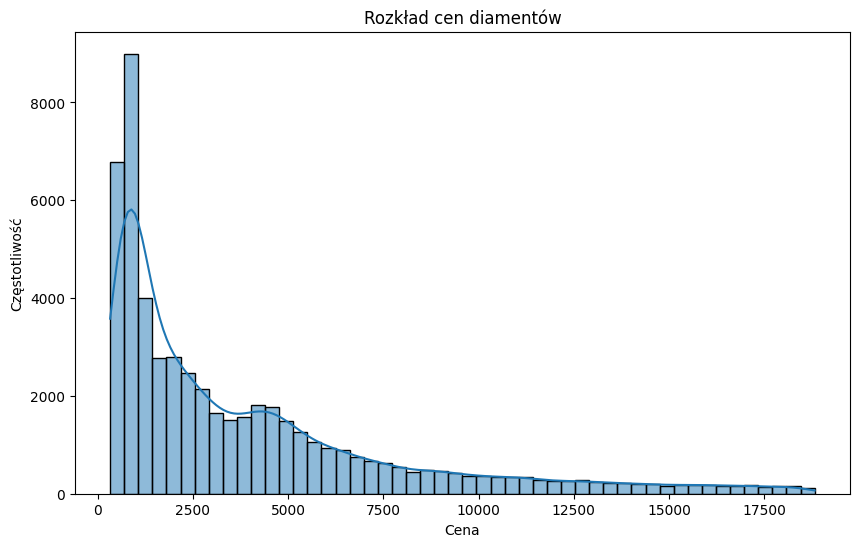

In [97]:
# Rozkład cen
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['price'], kde=True, bins=50)
plt.title('Rozkład cen diamentów')
plt.xlabel('Cena')
plt.ylabel('Częstotliwość')
plt.show()

In [98]:

# Podział na zmienne zależne (X) i niezależne (y)
X = diamonds.drop('price', axis=1)
y = diamonds['price']

In [99]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_train = poly_features.fit_transform(X_train)
# X_test = poly_features.fit_transform(X_test)

In [101]:
X_train

,carat
26546,2.01
9159,1.01
14131,1.10
15757,1.50
24632,1.52
...,...
11284,1.05
44732,0.47
38158,0.33
860,0.90


In [102]:
# Trening modelu regresji liniowej
# model = DecisionTreeRegressor(max_depth=4)
model = ElasticNet(alpha=0.2, l1_ratio=0.5)
# model = LinearRegression
model.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [ ]:
# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

In [ ]:
# Ewaluacja modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3640546.319490809
R^2 Score: 0.7709890413846007


In [ ]:
# export_graphviz(model, out_file="drzewo.dot")

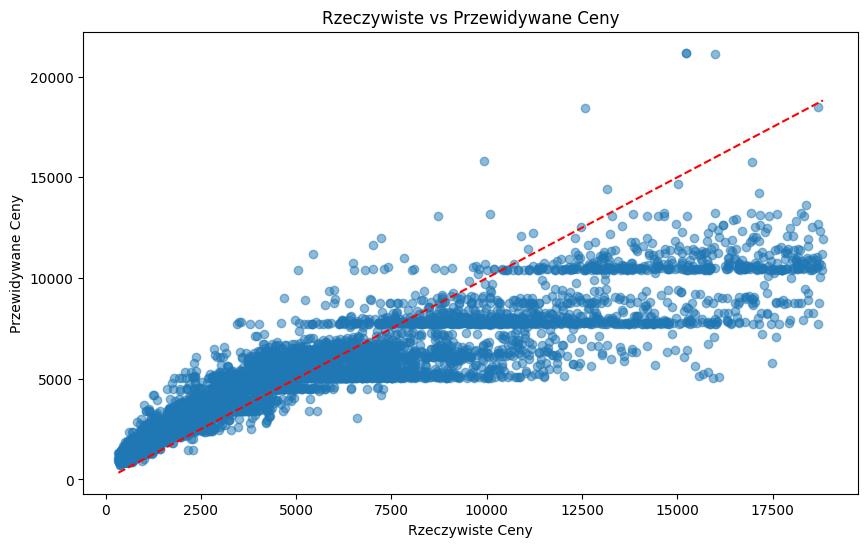

In [ ]:
# Wykres rozrzutu dla przewidywanych a rzeczywistych cen
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Rzeczywiste Ceny')
plt.ylabel('Przewidywane Ceny')
plt.title('Rzeczywiste vs Przewidywane Ceny')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linia idealnego dopasowania
plt.show()